In [1]:
import pandas as pd
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
week_nums = [210501,210508,210515,210522,210529,210605,210612,210619,210626,210703,210710,210717,210724,210731]
turnstile_dfs = get_data(week_nums)

In [2]:
turnstile_dfs.columns = [column.strip() for column in turnstile_dfs.columns]

In [3]:
turnstile_dfs['DATE_TIME'] = pd.to_datetime(turnstile_dfs.DATE + " " + turnstile_dfs.TIME,format="%m/%d/%Y %H:%M:%S")
turnstile_dfs['ACCUR_DATE_TIME'] = turnstile_dfs['DATE_TIME'].where((turnstile_dfs['DATE_TIME'].dt.hour != 0), turnstile_dfs['DATE_TIME'] + pd.tseries.offsets.Day(-1))
turnstile_dfs['STATION']= turnstile_dfs.STATION + " " + turnstile_dfs.LINENAME
turnstile_dfs['ACCUR_DATE'] = turnstile_dfs['ACCUR_DATE_TIME'].dt.date
turnstile_dfs['ACCUR_TIME'] = turnstile_dfs['ACCUR_DATE_TIME'].dt.time
turnstile_dfs.head(10)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ACCUR_DATE_TIME,ACCUR_DATE,ACCUR_TIME
0,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,2021-04-24 00:00:00,2021-04-23 00:00:00,2021-04-23,00:00:00
1,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00,2021-04-24 04:00:00,2021-04-24,04:00:00
2,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00,2021-04-24 08:00:00,2021-04-24,08:00:00
3,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00,2021-04-24 12:00:00,2021-04-24,12:00:00
4,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00,2021-04-24 16:00:00,2021-04-24,16:00:00
5,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,04/24/2021,20:00:00,REGULAR,7561578,2583031,2021-04-24 20:00:00,2021-04-24 20:00:00,2021-04-24,20:00:00
6,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,04/25/2021,00:00:00,REGULAR,7561638,2583044,2021-04-25 00:00:00,2021-04-24 00:00:00,2021-04-24,00:00:00
7,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,04/25/2021,04:00:00,REGULAR,7561643,2583045,2021-04-25 04:00:00,2021-04-25 04:00:00,2021-04-25,04:00:00
8,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,04/25/2021,08:00:00,REGULAR,7561649,2583055,2021-04-25 08:00:00,2021-04-25 08:00:00,2021-04-25,08:00:00
9,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,04/25/2021,12:00:00,REGULAR,7561670,2583087,2021-04-25 12:00:00,2021-04-25 12:00:00,2021-04-25,12:00:00


In [4]:
turnstile_daily = pd.DataFrame(turnstile_dfs, columns = ["C/A", "UNIT", "SCP", "STATION", "LINENAME", "DESC", "ACCUR_DATE"])
turnstile_daily['FIRST_EXIT'] = turnstile_dfs.groupby(["C/A", "UNIT", "SCP", "STATION", "ACCUR_DATE"])['EXITS'].transform('first')

In [5]:
turnstile_daily['ACCUR_DATE'] = pd.to_datetime(turnstile_daily['ACCUR_DATE'])
turnstile_daily = turnstile_daily[turnstile_daily.DESC != 'RECOVR AUD']
turnstile_daily.head(10)


,C/A,UNIT,SCP,STATION,LINENAME,DESC,ACCUR_DATE,FIRST_EXIT
0,A002,R051,02-00-00,59 ST NQR456W,NQR456W,REGULAR,2021-04-23,2582898
1,A002,R051,02-00-00,59 ST NQR456W,NQR456W,REGULAR,2021-04-24,2582903
2,A002,R051,02-00-00,59 ST NQR456W,NQR456W,REGULAR,2021-04-24,2582903
3,A002,R051,02-00-00,59 ST NQR456W,NQR456W,REGULAR,2021-04-24,2582903
4,A002,R051,02-00-00,59 ST NQR456W,NQR456W,REGULAR,2021-04-24,2582903
5,A002,R051,02-00-00,59 ST NQR456W,NQR456W,REGULAR,2021-04-24,2582903
6,A002,R051,02-00-00,59 ST NQR456W,NQR456W,REGULAR,2021-04-24,2582903
7,A002,R051,02-00-00,59 ST NQR456W,NQR456W,REGULAR,2021-04-25,2583045
8,A002,R051,02-00-00,59 ST NQR456W,NQR456W,REGULAR,2021-04-25,2583045
9,A002,R051,02-00-00,59 ST NQR456W,NQR456W,REGULAR,2021-04-25,2583045


In [6]:
station_daily = turnstile_daily.groupby(["C/A", "UNIT", "SCP", "STATION","ACCUR_DATE"])["FIRST_EXIT"].first().reset_index()
station_daily.head(10)

,C/A,UNIT,SCP,STATION,ACCUR_DATE,FIRST_EXIT
0,A002,R051,02-00-00,59 ST NQR456W,2021-04-23,2582898
1,A002,R051,02-00-00,59 ST NQR456W,2021-04-24,2582903
2,A002,R051,02-00-00,59 ST NQR456W,2021-04-25,2583045
3,A002,R051,02-00-00,59 ST NQR456W,2021-04-26,2583140
4,A002,R051,02-00-00,59 ST NQR456W,2021-04-27,2583343
5,A002,R051,02-00-00,59 ST NQR456W,2021-04-28,2583549
6,A002,R051,02-00-00,59 ST NQR456W,2021-04-29,2583827
7,A002,R051,02-00-00,59 ST NQR456W,2021-04-30,2584092
8,A002,R051,02-00-00,59 ST NQR456W,2021-05-01,2584372
9,A002,R051,02-00-00,59 ST NQR456W,2021-05-02,2584544


In [7]:
station_daily['DIFF_EXIT'] = station_daily['FIRST_EXIT'].diff()
station_daily.head(10)

,C/A,UNIT,SCP,STATION,ACCUR_DATE,FIRST_EXIT,DIFF_EXIT
0,A002,R051,02-00-00,59 ST NQR456W,2021-04-23,2582898,NaN
1,A002,R051,02-00-00,59 ST NQR456W,2021-04-24,2582903,5.0
2,A002,R051,02-00-00,59 ST NQR456W,2021-04-25,2583045,142.0
3,A002,R051,02-00-00,59 ST NQR456W,2021-04-26,2583140,95.0
4,A002,R051,02-00-00,59 ST NQR456W,2021-04-27,2583343,203.0
5,A002,R051,02-00-00,59 ST NQR456W,2021-04-28,2583549,206.0
6,A002,R051,02-00-00,59 ST NQR456W,2021-04-29,2583827,278.0
7,A002,R051,02-00-00,59 ST NQR456W,2021-04-30,2584092,265.0
8,A002,R051,02-00-00,59 ST NQR456W,2021-05-01,2584372,280.0
9,A002,R051,02-00-00,59 ST NQR456W,2021-05-02,2584544,172.0


In [8]:
#SQL query to find the difference in exits and it approximately matched my pandas query. 
import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine("sqlite:///Desktop/mta_data.db")
myQuery = 'SELECT DATE, STATION, EXITS - LAG(EXITS) OVER(PARTITION BY STATION ORDER BY DATE) AS DIFF_EXIT FROM mta_data WHERE EXITS >0 & EXITS <1000000 GROUP BY DATE LIMIT 10000;' 
all_data = pd.read_sql_query(myQuery, engine)
all_data.head(10)

,DATE,STATION,DIFF_EXIT
0,04/24/2021,59 ST,NaN
1,04/25/2021,59 ST,146.0
2,04/26/2021,59 ST,95.0
3,04/27/2021,59 ST,202.0
4,04/28/2021,59 ST,207.0
5,04/29/2021,59 ST,277.0
6,04/30/2021,59 ST,263.0
7,05/01/2021,59 ST,283.0
8,05/02/2021,59 ST,173.0
9,05/03/2021,59 ST,122.0


In [9]:
updated_daily = pd.DataFrame(station_daily, columns = ["C/A", "UNIT", "SCP", "STATION", "ACCUR_DATE", "FIRST_EXIT", "DIFF_EXIT"])
updated_daily.head(102)

,C/A,UNIT,SCP,STATION,ACCUR_DATE,FIRST_EXIT,DIFF_EXIT
0,A002,R051,02-00-00,59 ST NQR456W,2021-04-23,2582898,NaN
1,A002,R051,02-00-00,59 ST NQR456W,2021-04-24,2582903,5.0
2,A002,R051,02-00-00,59 ST NQR456W,2021-04-25,2583045,142.0
3,A002,R051,02-00-00,59 ST NQR456W,2021-04-26,2583140,95.0
4,A002,R051,02-00-00,59 ST NQR456W,2021-04-27,2583343,203.0
...,...,...,...,...,...,...,...
97,A002,R051,02-00-00,59 ST NQR456W,2021-07-29,2602648,283.0
98,A002,R051,02-00-00,59 ST NQR456W,2021-07-30,2602878,230.0
99,A002,R051,02-00-01,59 ST NQR456W,2021-04-23,1523748,-1079130.0
100,A002,R051,02-00-01,59 ST NQR456W,2021-04-24,1523749,1.0


In [10]:
import numpy as np
updated_daily['ACCUR_DATE'] = pd.to_datetime(station_daily['ACCUR_DATE'])

updated_daily.DIFF_EXIT.where(updated_daily.ACCUR_DATE != '2021-04-23', np.nan, inplace =True)
updated_daily.DIFF_EXIT.where(updated_daily.ACCUR_DATE != '2021-04-24', np.nan, inplace =True)


updated_daily.dropna(subset = ['DIFF_EXIT'],inplace = True)
updated_daily.describe()

,FIRST_EXIT,DIFF_EXIT
count,4.840270e+05,4.840270e+05
mean,3.342408e+07,-7.058055e+03
std,1.925046e+08,4.647270e+06
min,0.000000e+00,-1.875746e+09
25%,9.424800e+04,7.200000e+01
50%,8.499800e+05,2.430000e+02
75%,3.958790e+06,5.500000e+02
max,2.122940e+09,1.169856e+09


In [11]:
mask2 = ((updated_daily["DIFF_EXIT"] > 0) & (updated_daily["DIFF_EXIT"] < 1000000))
updated_daily = updated_daily[mask2]
updated_daily.head(10)


,C/A,UNIT,SCP,STATION,ACCUR_DATE,FIRST_EXIT,DIFF_EXIT
2,A002,R051,02-00-00,59 ST NQR456W,2021-04-25,2583045,142.0
3,A002,R051,02-00-00,59 ST NQR456W,2021-04-26,2583140,95.0
4,A002,R051,02-00-00,59 ST NQR456W,2021-04-27,2583343,203.0
5,A002,R051,02-00-00,59 ST NQR456W,2021-04-28,2583549,206.0
6,A002,R051,02-00-00,59 ST NQR456W,2021-04-29,2583827,278.0
7,A002,R051,02-00-00,59 ST NQR456W,2021-04-30,2584092,265.0
8,A002,R051,02-00-00,59 ST NQR456W,2021-05-01,2584372,280.0
9,A002,R051,02-00-00,59 ST NQR456W,2021-05-02,2584544,172.0
10,A002,R051,02-00-00,59 ST NQR456W,2021-05-03,2584667,123.0
11,A002,R051,02-00-00,59 ST NQR456W,2021-05-04,2584908,241.0


In [12]:
updated_daily = updated_daily.rename(columns={'C/A':'CA'})

In [22]:
station_totals = updated_daily.groupby('STATION')['DIFF_EXIT'].sum().reset_index().sort_values('DIFF_EXIT', ascending = False)
station_totals.head(20)

,STATION,DIFF_EXIT
93,34 ST-PENN STA ACE,4105545.0
89,34 ST-HERALD SQ BDFMNQRW,4089664.0
312,GRD CNTRL-42 ST 4567S,3935634.0
289,FLUSHING-MAIN 7,3313727.0
102,42 ST-PORT AUTH ACENQRS1237W,2765543.0
28,14 ST-UNION SQ LNQR456W,2247258.0
339,JKSN HT-ROOSVLT EFMR7,1940676.0
156,86 ST 456,1896476.0
448,TIMES SQ-42 ST 1237ACENQRSW,1823610.0
302,FULTON ST 2345ACJZ,1820223.0


In [14]:
mask3 = ((station_totals["DIFF_EXIT"] > 275000) & (station_totals["DIFF_EXIT"] < 500000))
median_stations = (station_totals[mask3].sort_values('DIFF_EXIT', ascending = True))
median_stations.head(20)

,STATION,DIFF_EXIT
141,74 ST-BROADWAY 7EFMR,275810.0
347,KINGSBRIDGE RD 4,276441.0
288,FLUSHING AV JM,278730.0
262,COURT SQ EMG,279657.0
466,WESTCHESTER SQ 6,280683.0
136,7 AV FG,280907.0
128,63 DR-REGO PARK MR,282299.0
453,UNION ST R,283344.0
462,WAKEFIELD/241 2,284329.0
398,OZONE PK LEFFRT A,285484.0


In [15]:
bank_turnstile_totals = pd.DataFrame(updated_daily, columns = ["CA", "UNIT", "SCP", "STATION", "LINENAME", "DESC", "ACCUR_DATE", "DIFF_EXIT"])
bank_turnstile_totals_CA = updated_daily.groupby(['STATION','CA'])['DIFF_EXIT'].sum().reset_index().sort_values('DIFF_EXIT', ascending = False) 

mask4 = ((bank_turnstile_totals_CA['STATION'] == '74 ST-BROADWAY 7EFMR') | (bank_turnstile_totals_CA['STATION'] == 'KINGSBRIDGE RD 4')
        | (bank_turnstile_totals_CA['STATION'] == 'FLUSHING AV JM') | (bank_turnstile_totals_CA['STATION'] == 'COURT SQ EMG')
        | (bank_turnstile_totals_CA['STATION'] == 'WESTCHESTER SQ 6') | (bank_turnstile_totals_CA['STATION'] == '7 AV FG')
        | (bank_turnstile_totals_CA['STATION'] == '63 DR-REGO PARK MR') | (bank_turnstile_totals_CA['STATION'] == 'UNION ST R')
        | (bank_turnstile_totals_CA['STATION'] == 'WAKEFIELD/241 2') | (bank_turnstile_totals_CA['STATION'] == 'OZONE PK LEFFRT A')
        | (bank_turnstile_totals_CA['STATION'] == 'MONTROSE AV L') | (bank_turnstile_totals_CA['STATION'] == 'BEDFORD-NOSTRAN G')
        | (bank_turnstile_totals_CA['STATION'] == 'FRANKLIN AV ACS') | (bank_turnstile_totals_CA['STATION'] == '52 ST 7')
        | (bank_turnstile_totals_CA['STATION'] == 'FRESH POND RD M') | (bank_turnstile_totals_CA['STATION'] == '168 ST AC1')
        | (bank_turnstile_totals_CA['STATION'] == 'NEW LOTS AV 3') | (bank_turnstile_totals_CA['STATION'] == 'WEST FARMS SQ 25')
        | (bank_turnstile_totals_CA['STATION'] == '116 ST 23') | (bank_turnstile_totals_CA['STATION'] == 'FRANKLIN AV 2345S'))
bank_turnstile_totals = bank_turnstile_totals_CA[mask4]
bank_turnstile_totals.head(26)


,STATION,CA,DIFF_EXIT
468,FRANKLIN AV 2345S,R622,296574.0
729,WEST FARMS SQ 25,R323,294701.0
608,NEW LOTS AV 3,R634,294532.0
475,FRESH POND RD M,K025,289668.0
209,52 ST 7,R521,288371.0
591,MONTROSE AV L,H017,287022.0
630,OZONE PK LEFFRT A,N141,285484.0
720,WAKEFIELD/241 2,R336,284329.0
240,7 AV FG,N539,280907.0
730,WESTCHESTER SQ 6,R420,280683.0


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg'] 
%matplotlib inline 
sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=0.6)

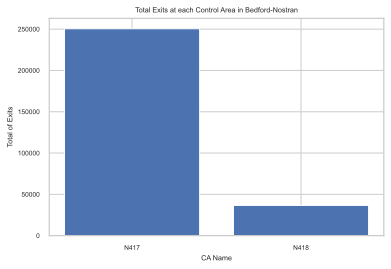

In [17]:
mask6= bank_turnstile_totals['STATION'] == 'BEDFORD-NOSTRAN G'
one_turnstile_totals = bank_turnstile_totals[mask6]
plt.bar(one_turnstile_totals['CA'], one_turnstile_totals['DIFF_EXIT'])
plt.xlabel('CA Name')
plt.ylabel('Total of Exits')
plt.title('Total Exits at each Control Area in Bedford-Nostran');

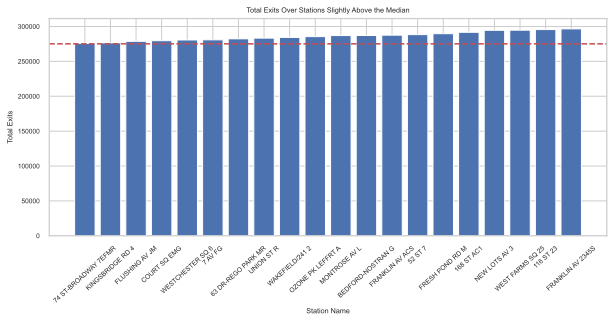

In [18]:
plt.figure(figsize=(10,4))
plt.bar(median_stations['STATION'][0:20], median_stations['DIFF_EXIT'][0:20])
plt.xlabel('Station Name')
plt.ylabel('Total Exits')
plt.title('Total Exits Over Stations Slightly Above the Median')
plt.xticks(rotation=42);
plt.axhline(station_totals['DIFF_EXIT'].median(), color='r', linestyle='--');

In [19]:
updated_daily.head(20)
updated_daily["DAY_OF_WEEK"] = updated_daily["ACCUR_DATE"].dt.dayofweek
best_day_station = updated_daily.groupby(['STATION','DAY_OF_WEEK'])['DIFF_EXIT'].sum().reset_index().sort_values('DIFF_EXIT', ascending = False) 
mask5 = ((best_day_station['STATION'] == '74 ST-BROADWAY 7EFMR') | (best_day_station['STATION'] == 'KINGSBRIDGE RD 4')
        | (best_day_station['STATION'] == 'FLUSHING AV JM') | (best_day_station['STATION'] == 'COURT SQ EMG')
        | (best_day_station['STATION'] == 'WESTCHESTER SQ 6') | (best_day_station['STATION'] == '7 AV FG')
        | (best_day_station['STATION'] == '63 DR-REGO PARK MR') | (best_day_station['STATION'] == 'UNION ST R')
        | (best_day_station['STATION'] == 'WAKEFIELD/241 2') | (best_day_station['STATION'] == 'OZONE PK LEFFRT A')
        | (best_day_station['STATION'] == 'MONTROSE AV L') | (best_day_station['STATION'] == 'BEDFORD-NOSTRAN G')
        | (best_day_station['STATION'] == 'FRANKLIN AV ACS') | (best_day_station['STATION'] == '52 ST 7')
        | (best_day_station['STATION'] == 'FRESH POND RD M') | (best_day_station['STATION'] == '168 ST AC1')
        | (best_day_station['STATION'] == 'NEW LOTS AV 3') | (best_day_station['STATION'] == 'WEST FARMS SQ 25')
        | (best_day_station['STATION'] == '116 ST 23') | (best_day_station['STATION'] == 'FRANKLIN AV 2345S'))

best_day_station = best_day_station[mask5]
best_day_station.head(26)

,STATION,DAY_OF_WEEK,DIFF_EXIT
817,52 ST 7,5,52937.0
2090,FRESH POND RD M,4,50827.0
3255,WESTCHESTER SQ 6,2,50206.0
2089,FRESH POND RD M,3,50159.0
2789,OZONE PK LEFFRT A,3,50135.0
3256,WESTCHESTER SQ 6,3,50014.0
2790,OZONE PK LEFFRT A,4,49773.0
3257,WESTCHESTER SQ 6,4,49747.0
3249,WEST FARMS SQ 25,3,49632.0
2088,FRESH POND RD M,2,49328.0


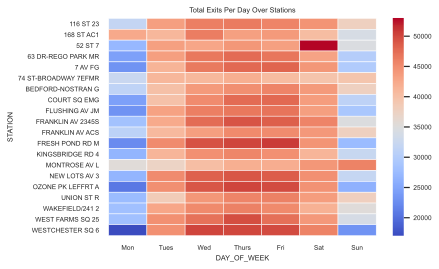

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
week_days = ['Mon', 'Tues', 'Wed','Thurs','Fri','Sat','Sun']
best_day_station_pivot = best_day_station.pivot(index = 'STATION', columns = 'DAY_OF_WEEK', values = 'DIFF_EXIT')
best_day_station_heatmap = sns.heatmap(best_day_station_pivot, linewidth=0.5, cmap = 'coolwarm')
best_day_station_heatmap.set_xticklabels(week_days)
plt.title('Total Exits Per Day Over Stations')
plt.show()